# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Thu Jan 12 17:16:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

1.13.1+cu116


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(root='data', train=True, download=True, transform=ToTensor(), target_transform=None)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=ToTensor(), target_transform=None)
len(train_data), len(test_data)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])

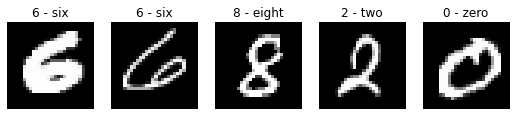

In [19]:
torch.manual_seed(42)
class_names = train_data.classes
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(9,9))
for i in range(5):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(1, 5, i+1)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.axis(False)
  plt.title(class_names[label])
img = train_data[0][0]
img.shape

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [34]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_data_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_data_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)
len(train_data_loader), len(test_data_loader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [93]:
from torch.nn.modules.pooling import MaxPool1d
from torch.nn.modules.activation import ReLU
from torch import nn
class MNISTModel(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels = hidden_units,
                  kernel_size = 3, padding = 1, stride = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, padding = 1, stride = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2))
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, padding = 1, stride = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, padding = 1, stride = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2))
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, out_features = output_shape))
  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

model_0 = MNISTModel(input_shape = 1, hidden_units = 8, output_shape = len(class_names)).to(device)
model_0

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=392, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [94]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

import requests
from pathlib import Path

if not Path("helper_functions.py").is_file():
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn
accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [95]:
def train_step(model, data_loader, device = device):
  model.train()
  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(data_loader):
    X = X.to(device)
    y = y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (batch % 400 == 0):
      print(f"Images: {batch*len(X)}/{len(data_loader.dataset)}")
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss}, Train Acc: {train_acc}")

def test_step(model, data_loader, device = device):
  model.eval()
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for X_test, y_test in test_data_loader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)

      test_pred = model(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss}, Test Acc: {test_acc}")

In [96]:
torch.manual_seed(42)
epochs = 5

start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  
  train_step(model = model_0, data_loader = train_data_loader)
  test_step(model = model_0, data_loader = test_data_loader)
total_time_GPU = timer() - start_time

total_time_GPU

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Images: 0/60000
Images: 12800/60000
Images: 25600/60000
Images: 38400/60000
Images: 51200/60000
Train Loss: 0.26705464720726013, Train Acc: 91.23
Test Loss: 0.06520792841911316, Test Acc: 97.8035143769968
Epoch: 1
------
Images: 0/60000
Images: 12800/60000
Images: 25600/60000
Images: 38400/60000
Images: 51200/60000
Train Loss: 0.074711874127388, Train Acc: 97.66166666666666
Test Loss: 0.052891794592142105, Test Acc: 98.22284345047923
Epoch: 2
------
Images: 0/60000
Images: 12800/60000
Images: 25600/60000
Images: 38400/60000
Images: 51200/60000
Train Loss: 0.060068946331739426, Train Acc: 98.09833333333333
Test Loss: 0.04741841182112694, Test Acc: 98.46246006389777
Epoch: 3
------
Images: 0/60000
Images: 12800/60000
Images: 25600/60000
Images: 38400/60000
Images: 51200/60000
Train Loss: 0.05193931609392166, Train Acc: 98.39
Test Loss: 0.05127948895096779, Test Acc: 98.29273162939297
Epoch: 4
------
Images: 0/60000
Images: 12800/60000
Images: 25600/60000
Images: 38400/600

54.32084478900015

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [114]:
def make_predictions(model, data, device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = sample.unsqueeze(0)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob)
    return torch.stack(pred_probs).to(device)

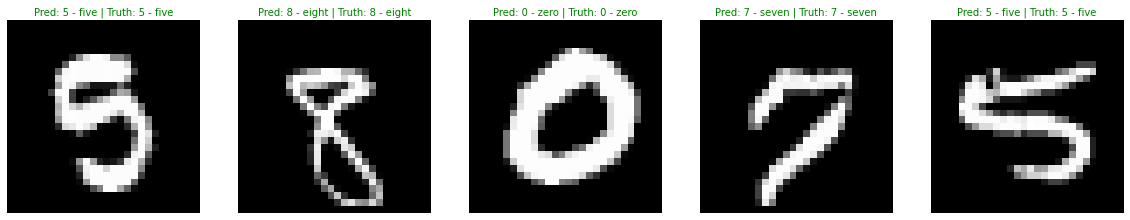

In [123]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=5):
  test_samples.append(sample)
  test_labels.append(label)

pred_probs = make_predictions(model_0.to("cpu"), test_samples)
pred_classes = torch.argmax(pred_probs, dim=1)

plt.figure(figsize = (20, 20))
for i, sample in enumerate(test_samples):
  plt.subplot(1, 5, i+1)
  plt.imshow(sample.squeeze(), cmap = "gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = "g")
  else:
    plt.title(title_text, fontsize = 10, c = "r")
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [125]:
!pip install -q torchmetrics -U mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.1 MB/s eta 0:00:00


In [131]:
import torchmetrics
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

model_0.eval()
y_preds = []
model_0 = model_0.to(device)
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_data_loader)):
    X, y = X.to(device), y.to(device)
    y_logits = model_0(X)
    y_preds.append(torch.argmax(torch.softmax(y_logits, dim = 1), dim = 1))
  y_preds = torch.cat(y_preds).cpu()

0it [00:00, ?it/s]

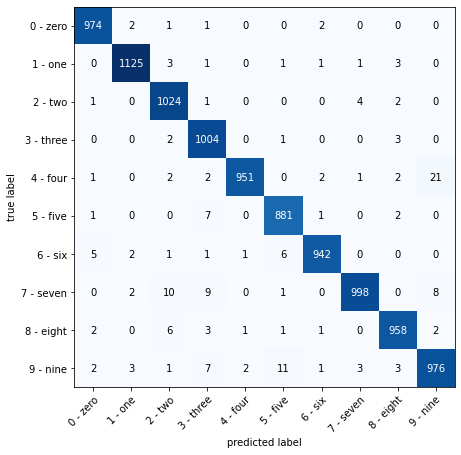

In [133]:
confmat = ConfusionMatrix(task = "multiclass", num_classes = len(class_names))
confmat_tensor = confmat(preds = y_preds, target = test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(), class_names = class_names, figsize = (10,7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?